In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

%matplotlib inline

In [2]:
wine = load_wine()

In [3]:
wine.data.shape

(178, 13)

In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

# Approach
### 1: Define the Business Problem
### 2. Read the data set
### 3. Perform EDA & understand the data
### 4. Do a Train-test split
### 5. CV on the train with both models [Logistic & Linear] to get a better understanding of which model is a better fit
### 6. Build the final model
### 7. Evaluate the results

### 8. Present the results back to Business stakeholders (2-3 lines describing your recommendation)

## Business Problem

Use multiple attributes 

to [determine/classify/predict][] the quality of wine provided 

in order to ...

## Read in the Data set

In [6]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['wine_quality'] = wine.target

In [7]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
wine_quality                    178 non-null int32
dtypes: float64(13), int32(1)
memory usage: 18.9 KB


We can observe that:

- All input data types are Float 
- No visible Null values in the data set

In [17]:
extraneous = ['magnesium', 'proline']

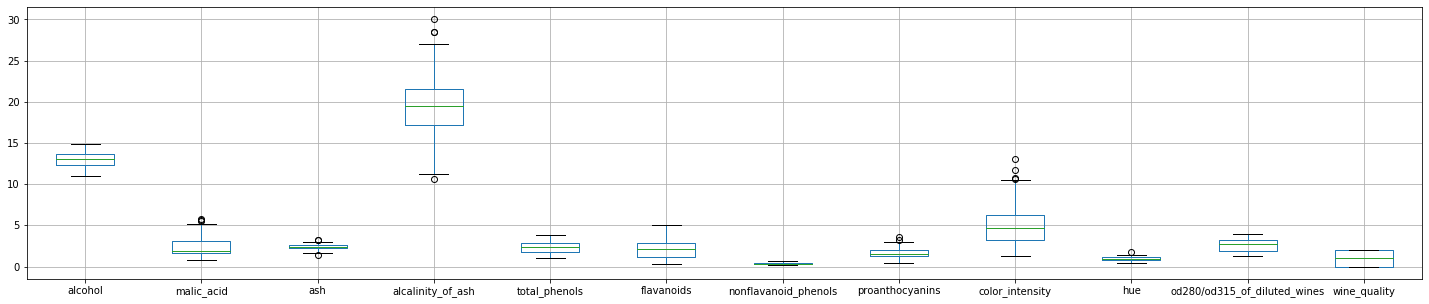

In [21]:
df[[k for k in df.columns if k not in extraneous]].boxplot(figsize=(25,5))

In [22]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_quality
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


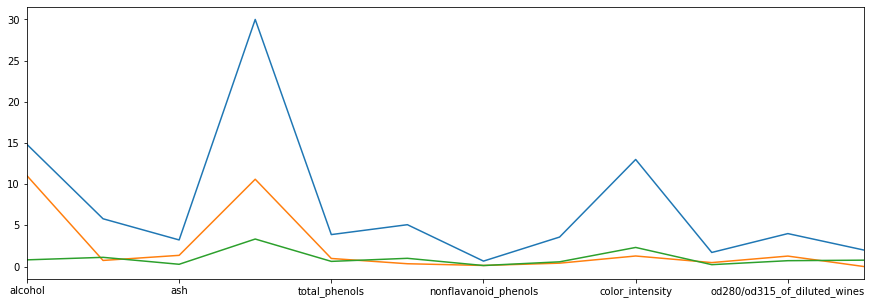

In [33]:
df[[k for k in df.columns if k not in extraneous]].max().plot(figsize = (15,5))
df[[k for k in df.columns if k not in extraneous]].min().plot(figsize = (15,5))
df[[k for k in df.columns if k not in extraneous]].std().plot(figsize = (15,5))
plt.show()

### Split the data set into Train-Test

In [34]:
from sklearn.model_selection import cross_val_score, train_test_split

In [36]:
target = 'wine_quality'
X = df[[k for k in df.columns if k!=target]]
y = df[target]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Instantiate models to be used (Logistic & kNN)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [39]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()

In [42]:
cross_val_score(logreg, X_train, y_train, cv=10)

f:\old_vd_laptop_backup__190804\code\fastai_v1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
f:\old_vd_laptop_backup__190804\code\fastai_v1\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
f:\old_vd_laptop_backup__190804\code\fastai_v1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
f:\old_vd_laptop_backup__190804\code\fastai_v1\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
f:\old_vd_laptop_b

array([1.        , 0.93333333, 1.        , 0.85714286, 1.        ,
       0.92307692, 0.91666667, 1.        , 0.91666667, 0.91666667])

In [43]:
cross_val_score(logreg, X_train, y_train, cv=10).mean()

f:\old_vd_laptop_backup__190804\code\fastai_v1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
f:\old_vd_laptop_backup__190804\code\fastai_v1\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
f:\old_vd_laptop_backup__190804\code\fastai_v1\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
f:\old_vd_laptop_backup__190804\code\fastai_v1\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
f:\old_vd_laptop_b

0.9463553113553113

In [45]:
cross_val_score(knn, X_train, y_train, cv=10)

array([0.6       , 0.66666667, 0.6       , 0.57142857, 0.53846154,
       0.69230769, 0.58333333, 0.75      , 0.66666667, 0.75      ])

In [46]:
cross_val_score(knn, X_train, y_train, cv=10).mean()

0.6418864468864469

### Above, we notice that:
- Logistic Regression is mostly overfitting the model (accuracy score of 94.636%)
- kNN is providing an accuracy score of 64% 